In [1]:
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X = digits.data
Y = digits.target
param_range = np.logspace(-6,-2.3,5)

In [3]:
train_loss,test_loss = validation_curve(SVC(),X,Y,param_name="gamma",
                                                param_range=param_range,
                                                cv=10,
                                                 scoring='neg_mean_squared_error',
                                            )

In [4]:
param_range

array([1.00000000e-06, 8.41395142e-06, 7.07945784e-05, 5.95662144e-04,
       5.01187234e-03])

In [5]:
train_mean = -np.mean(train_loss,axis=1)
test_mean = -np.mean(test_loss,axis=1)

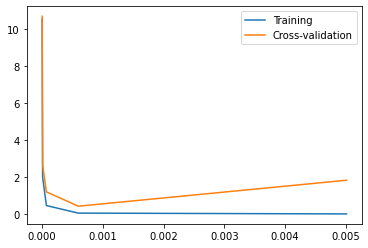

In [7]:

plt.plot(param_range,train_mean,label="Training")
plt.plot(param_range,test_mean,label="Cross-validation")
plt.legend()
plt.show()

验证曲线（validation_curve）和学习曲线（sklearn.model_selection.learning_curve()）的区别是，验证曲线的横轴为某个超参数，如一些树形集成学习算法中的max_depth、min_sample_leaf等等。
从验证曲线上可以看到随着超参数设置的改变，模型可能从欠拟合到合适，再到过拟合的过程，进而选择一个合适的位置，来提高模型的性能。